### Transforming [Jy/beam] to [K]

In [ ]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy import constants as const

from spectral_cube import SpectralCube
from radio_beam import Beam


# Abrir el archivo FITS y leer el header
file =  'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/resampled_cube_invert.fits'
hdul = fits.open(file)
header = hdul[0].header

# Extraer parámetros del header
bmaj = header['BMAJ'] * u.deg  # eje mayor
bmin = header['BMIN'] * u.deg  # eje menor
bpa = header['BPA'] * u.deg  # posición del eje mayor
restfreq = header['RESTFRQ']  * u.Hz

#convert restfreq to Hz in GHz
restfreq = restfreq.to(u.GHz)

print(f"BMAJ: {bmaj}, BMIN: {bmin}, RESTFRQ: {restfreq}, BPA: {bpa}")

SIGMA_TO_FWHM = np.sqrt(8*np.log(2))
# obtain beam area
beam = Beam(major=bmaj , minor=bmin, pa=bpa)
print(f"Beam: {beam}")




fwhm_to_sigma = 1./(8*np.log(2))**0.5
beam_area = 2.*np.pi*(bmaj*bmin*fwhm_to_sigma**2)
print(f"Beam area: {beam_area}")

equiv = u.brightness_temperature(restfreq)
(u.Jy/beam_area).to(u.K, equivalencies=equiv)




BMAJ: 0.004442253420057 deg, BMIN: 0.003226777089219 deg, RESTFRQ: 102.58747600000001 GHz, BPA: -85.5068698214 deg
Beam: 4.947564339454967e-09 sr
Beam area: 1.624189563065442e-05 deg2


<Quantity 0.62509782 K>

In [ ]:
cube = SpectralCube.read(file)

# Convert the Jy/beam to K using the equivalency
cube_k = cube.to(u.K)

# Obtain the essential information from the cubes
UNIT1 = cube.header['CUNIT3']
RESTFRQ1 = cube.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL1 = cube.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX1 = cube.header['CRPIX3']  # Reference pixel of the third axis
CDELT1 = cube.header['CDELt3'] * u.km/u.s # Coordinate increment at reference point
nchan1 = cube.shape[0]

# Visualizar un espectro en un píxel específico (por ejemplo, en el centro)
x = 63
y = 73
index1 = np.arange(1, nchan1 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL1 = CRVAL1 + (index1 - CRPIX1) * CDELT1 #Create the velocity axis

# Define the desired velocity range
vel_min = -50 * u.km/u.s 
vel_max = 300 * u.km/u.s 

mask1 = (VEL1 >= vel_min) & (VEL1 <= vel_max)

VEL1_filtered = VEL1[mask1]
intensity = cube_k[:, y, x].value  # Extract the intensity values within the mask
print(intensity )
intensity.max()
print(f'intensity max: {intensity.max()} K')
int_filt1 = intensity[mask1]
int_filt1.max()
print(f'int_filt1 max: {int_filt1.max()} K')



[-1.55397234e-03 -2.03399148e-03 -1.88772209e-04 -9.21152784e-04
  2.08530861e-03  1.53186161e-04 -5.85531274e-04  9.69636920e-04
  2.57458937e-03 -1.21828002e-03 -1.00672194e-03 -3.24124167e-04
  8.90743936e-05 -1.20829307e-03  1.39532732e-03 -1.24366965e-03
 -1.61657350e-03  2.11016444e-03 -8.78007538e-04 -1.01663919e-03
  1.94657609e-03  9.49880469e-05 -1.51016001e-03 -2.41776231e-03
 -2.69262451e-05  1.07489656e-03 -1.04224862e-03  3.20058055e-03
 -3.89779709e-04  4.49296899e-04  1.51465233e-03 -8.75595221e-04
  2.73346453e-03 -2.79679010e-04  8.42562913e-05 -3.80882748e-03
 -1.16877170e-03 -2.50531459e-03  6.32560383e-04  5.74733746e-04
 -1.86559863e-03 -1.94068189e-03 -9.43093681e-04 -1.71296106e-03
  3.62938027e-03  3.08509247e-03 -2.39783684e-03  4.58139329e-03
  1.03547943e-03 -3.11324886e-04 -9.77640613e-04  3.02350168e-03
  2.78340009e-03  2.19344447e-03 -6.25374937e-04 -1.54771871e-03
  3.52529451e-04 -2.44574677e-03 -5.11671671e-03 -3.51879951e-03
 -2.47730127e-03 -1.64352

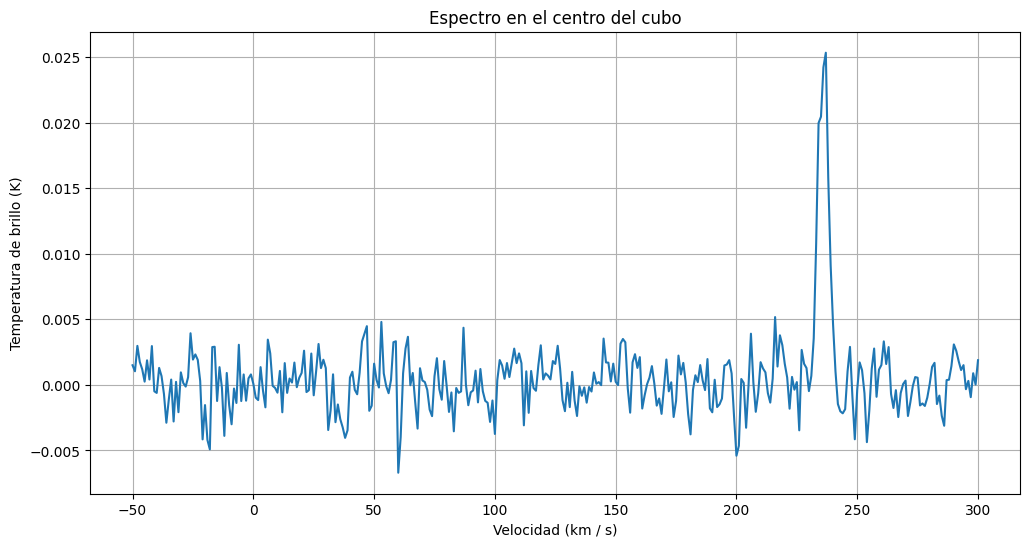

In [56]:
import numpy as np
from spectral_cube import SpectralCube
from astropy import units as u


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(VEL1_filtered.value, int_filt1)
plt.xlabel(f'Velocidad ({VEL1.unit})')
plt.ylabel('Temperatura de brillo (K)')
plt.title('Espectro en el centro del cubo')
plt.grid()
plt.show()


## Transforming to T main beam con la eficiencia de la antena